In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [8]:
img = cv2.imread('data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape

(1024, 1024, 3)

## 1-1. cluster with only RGB values

In [10]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    print(center)
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

[[129 175 100]
 [129 175 100]
 [129 175 100]
 ...
 [153 207 109]
 [153 207 109]
 [153 207 109]]
[[163.22060419 197.69384798 120.57511082]
 [107.56467439  95.44996552  71.51138622]]


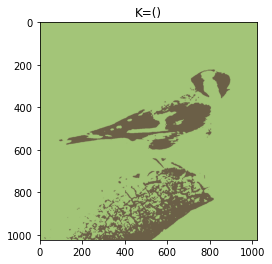

In [7]:
h, w, c = img.shape
Z=img.reshape((-1,3))
print(Z)
K=2
label, center=km_clust(Z,K)
center=np.uint8(center[:,:3])
center
res=center[label.flatten()]
res=res.reshape(img.shape)

plt.title("K=()".format(K))
plt.imshow(res)

[[107.6958206   95.56751108  71.60331411]
 [163.22627536 197.72436505 120.58396853]]
[[160.65294628 204.76232998 114.70869139]
 [143.73070433 128.0844475   96.97061549]
 [ 57.88739178  54.81990248  45.97472385]
 [183.84610531 182.58855324 164.71518701]]


<function matplotlib.pyplot.show(close=None, block=None)>

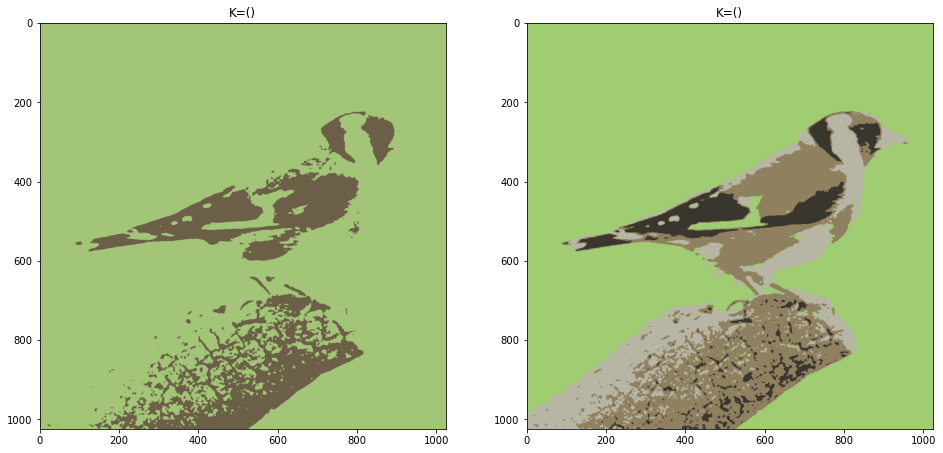

In [8]:
h, w, c = img.shape
Z=img.reshape((-1,3))
Ka=[2,4]
plt.figure(figsize=(16,12))
for i,K in enumerate(Ka):
    label, center=km_clust(Z,K)
    center=np.uint8(center[:,:3])
    center
    res=center[label.flatten()]
    res=res.reshape(img.shape)

    plt.subplot(1,len(Ka),i+1)
    plt.title("K=()".format(K))
    plt.imshow(res)
plt.show

In [9]:
label.shape

(1048576,)

## 1-2. cluster with RGB values and the location

[[156.45208871 180.37056959 110.40239898 510.38647099 766.51045019]
 [154.43502403 186.48093323 117.06854501 512.62213415 254.51887912]]
[[155.62152749 177.49852848 109.33115584 257.20193617 767.73164407]
 [151.94212313 194.14173849 111.37448095 254.03744771 255.93360812]
 [157.04258875 179.10035595 122.73435995 766.32297706 255.00357095]
 [157.17672716 182.96674051 111.43436674 768.91186024 767.18501812]]
[[148.28473873 187.6930169  110.88966711 513.46262636 243.93020264]
 [160.4582267  203.18219653 117.8027337  844.39764556 865.7461046 ]
 [157.57688866 196.37827164 111.30289539 199.69087749 509.98152572]
 [164.83997747 189.56860179 134.38569405 846.90094672 164.75813572]
 [157.95803292 173.47391867 107.92195571 507.35755631 772.22183182]
 [157.89601449 183.1153262  114.72571224 175.77664936 861.45080695]
 [152.38856442 194.67430374 111.96860347 175.59979642 162.50192734]
 [146.33755443 144.64696176 104.37220037 822.65499444 518.49151298]]
[[168.9570228  193.13997027 142.13496607 888.

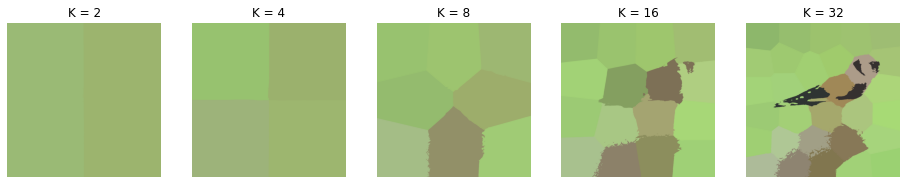

In [10]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

NameError: name 'img' is not defined

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

[[153.24099711 174.75901733 108.17915859 132.92322046 187.63384762]
 [157.9178327  193.10434851 119.92928615 122.2228683   60.96728863]]
[[167.56563536 206.09094704 123.01052446 169.22837509 211.82639162]
 [157.92038012 192.79789841 112.3477053   45.8612489  124.35839394]
 [166.10084587 199.66624683 129.66014255 168.12194428  51.51791925]
 [113.98722234 101.87602408  75.82967941 173.11770322 137.95255583]]
[[162.72927544 145.1635265  105.86810217 124.1460502  156.60641707]
 [158.08215619 199.62023801 110.6786001   44.92284874 126.8596296 ]
 [167.97312089 200.47626006 133.5479549  187.9302439   52.9466303 ]
 [164.59761264 211.33438268 120.36402575 194.67196021 212.29521504]
 [156.19561718 200.94820874 114.51988195  67.23238281  42.26619583]
 [ 47.12736091  48.03107678  45.9537056  116.69310716 136.69793805]
 [132.18550221 119.87063497  90.28201019 218.40738564 127.89486513]
 [166.70865367 198.56567667 122.32581305  56.96498795 221.09677032]]
[[144.47837283 135.74507878 115.57463664 229.

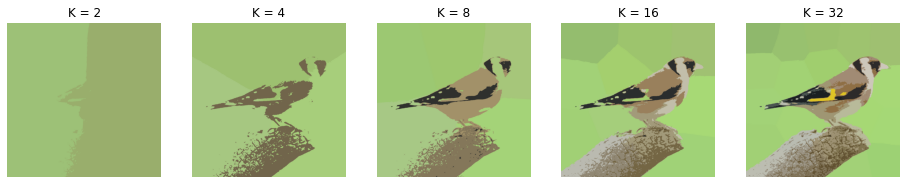

In [11]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h/4], [w/4]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()